# Importing Packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency

# Loading dataset
data = pd.read_csv("/content/WFH_WFO_dataset.csv")

# Quick check
print(data.shape)
data.head()

(207, 20)


,ID,Name,Age,Occupation,Gender,Same_office_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,Preference
0,1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1,WFH
1,2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1,WFH
2,3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1,WFH
3,4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0,WFO
4,5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1,WFH


# Data Check

In [ ]:
# 1. Missing values check

missing_values = data.isnull().sum().sum()
if missing_values == 0:
    print("✅ No missing values found (no imputation or deletion required).")
else:
    print(f"⚠️ Found {missing_values} missing values in dataset.")


# 2. Duplicate check

duplicate_rows = data.duplicated().sum()
if duplicate_rows == 0:
    print("✅ No duplicate records found (one respondent per record).")
else:
    print(f"⚠️ Found {duplicate_rows} duplicate records.")


# 3. Consistency checks (categorical columns)

categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if col != "Preference":  # Skip Preference column
        data[col] = data[col].str.strip().str.capitalize()
    else:
        data[col] = data[col].str.strip()  # only strip spaces, no capitalization

print("✅ Consistency checks applied (whitespace removed, capitalization standardized).")

# 4. Optional: Summary Report

print("\nSummary of Data Quality Checks:")
print(f"Shape of dataset: {data.shape}")
print(f"Missing values: {missing_values}")
print(f"Duplicate rows: {duplicate_rows}")
print(f"Categorical columns checked: {list(categorical_cols)}")

✅ No missing values found (no imputation or deletion required).
✅ No duplicate records found (one respondent per record).
✅ Consistency checks applied (whitespace removed, capitalization standardized).

Summary of Data Quality Checks:
Shape of dataset: (207, 20)
Missing values: 0
Duplicate rows: 0
Categorical columns checked: ['Name', 'Occupation', 'Gender', 'Same_office_home_location', 'kids', 'RM_save_money', 'RM_quality_time', 'RM_better_sleep', 'calmer_stressed', 'digital_connect_sufficient', 'RM_job_opportunities', 'Preference']


# Reformatting Columns

In [ ]:
# Reformattong column names
data.columns = [
    col.replace("_", " ").title() for col in data.columns
]

print("✅ Column names reformatted:")
print(list(data.columns))

✅ Column names reformatted:
['Id', 'Name', 'Age', 'Occupation', 'Gender', 'Same Office Home Location', 'Kids', 'Rm Save Money', 'Rm Quality Time', 'Rm Better Sleep', 'Calmer Stressed', 'Rm Professional Growth', 'Rm Lazy', 'Rm Productive', 'Digital Connect Sufficient', 'Rm Better Work Life Balance', 'Rm Improved Skillset', 'Rm Job Opportunities', 'Target', 'Preference']


# Visualization

/tmp/ipython-input-3209330747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Preference', data=data, palette='pastel')


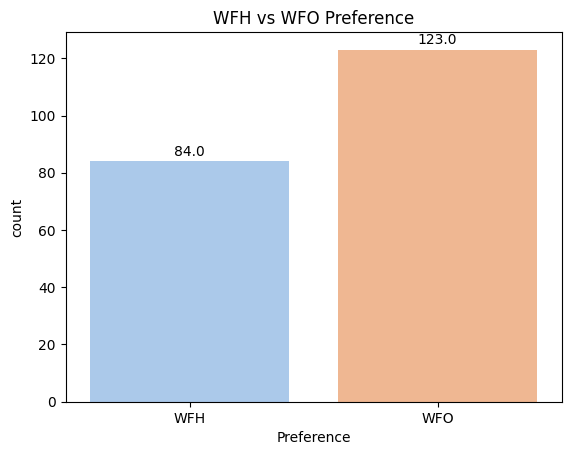


Preference Percentage:
 Preference
WFO    59.42029
WFH    40.57971
Name: proportion, dtype: float64


In [ ]:
# Count plot
ax = sns.countplot(x='Preference', data=data, palette='pastel')
plt.title("WFH vs WFO Preference")
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width()/2, p.get_height() + 2), ha='center')
plt.show()

# Percentage table
pref_pct = data['Preference'].value_counts(normalize=True) * 100
print("\nPreference Percentage:\n", pref_pct)

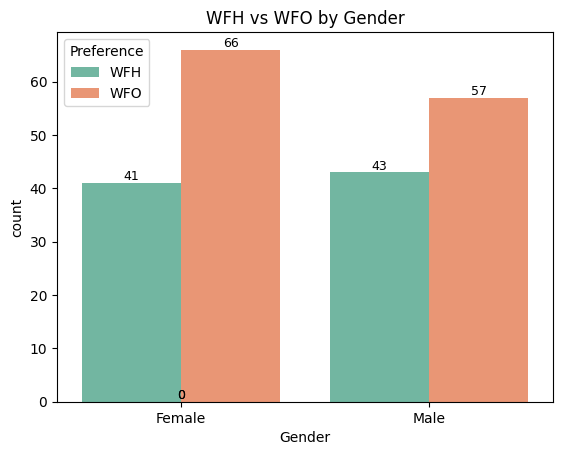

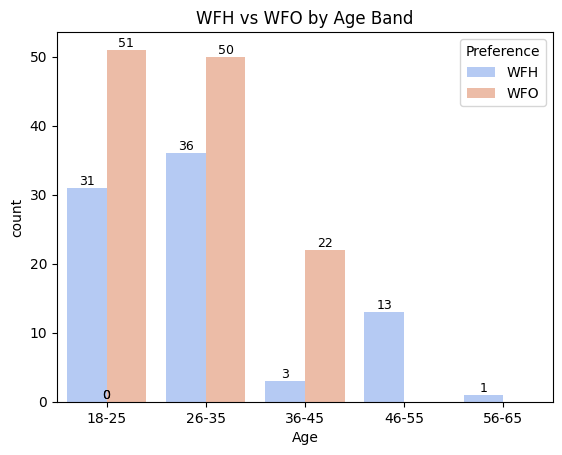

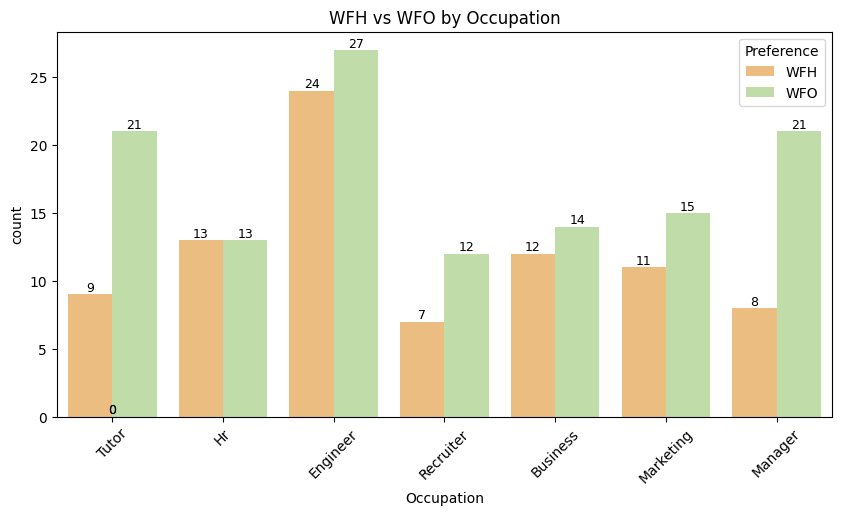

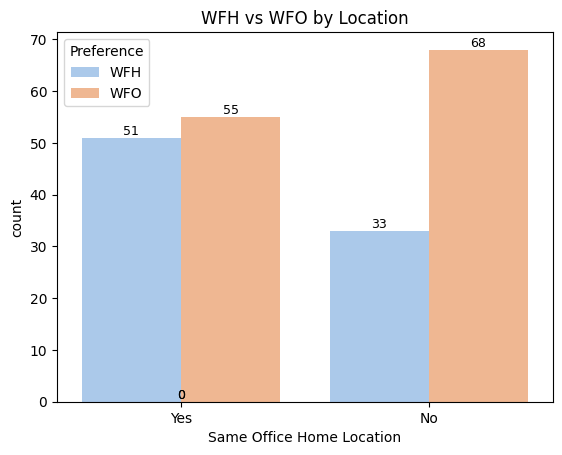

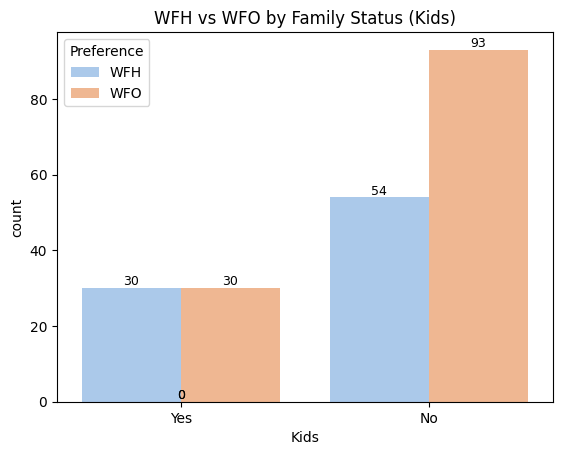

In [ ]:
# Ensuring column names are cleaned before plotting

def add_counts(ax):
    """Function to add counts on top of bars"""
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}",
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=9, color='black')

# Gender vs Preference
if 'Gender' in data.columns and 'Preference' in data.columns:
    ax = sns.countplot(x='Gender', hue='Preference', data=data, palette='Set2')
    add_counts(ax)
    plt.title("WFH vs WFO by Gender")
    plt.show()

# Age bands
if 'Age' in data.columns:
    data['Age'] = pd.cut(data['Age'],
                              bins=[18, 25, 35, 45, 55, 65],
                              labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
    if 'Preference' in data.columns:
        ax = sns.countplot(x='Age', hue='Preference', data=data, palette='coolwarm')
        add_counts(ax)
        plt.title("WFH vs WFO by Age Band")
        plt.show()

# Occupation vs Preference
if 'Occupation' in data.columns and 'Preference' in data.columns:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x='Occupation', hue='Preference', data=data, palette='Spectral')
    add_counts(ax)
    plt.title("WFH vs WFO by Occupation")
    plt.xticks(rotation=45)
    plt.show()

# Same Office Location vs Preference
if 'Same Office Home Location' in data.columns and 'Preference' in data.columns:
    ax = sns.countplot(x='Same Office Home Location', hue='Preference', data=data, palette='pastel')
    add_counts(ax)
    plt.title("WFH vs WFO by Location")
    plt.show()


# Kids vs Preference
if 'Kids' in data.columns and 'Preference' in data.columns:
    ax = sns.countplot(x='Kids', hue='Preference', data=data, palette='pastel')
    add_counts(ax)
    plt.title("WFH vs WFO by Family Status (Kids)")
    plt.show()


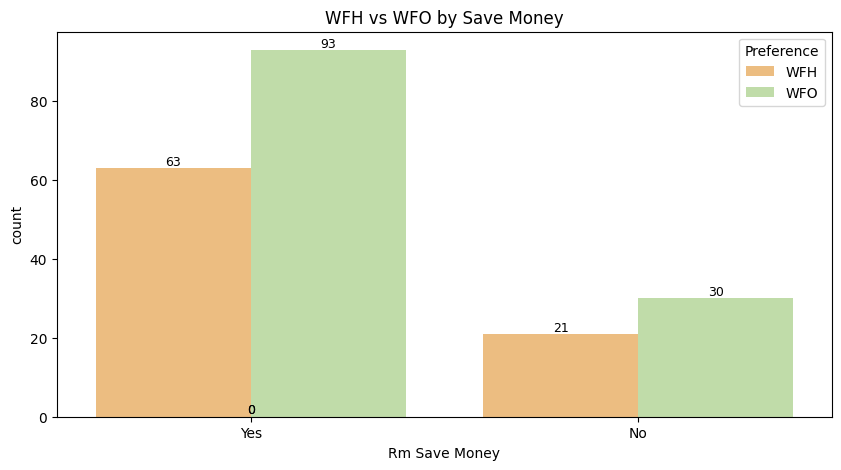

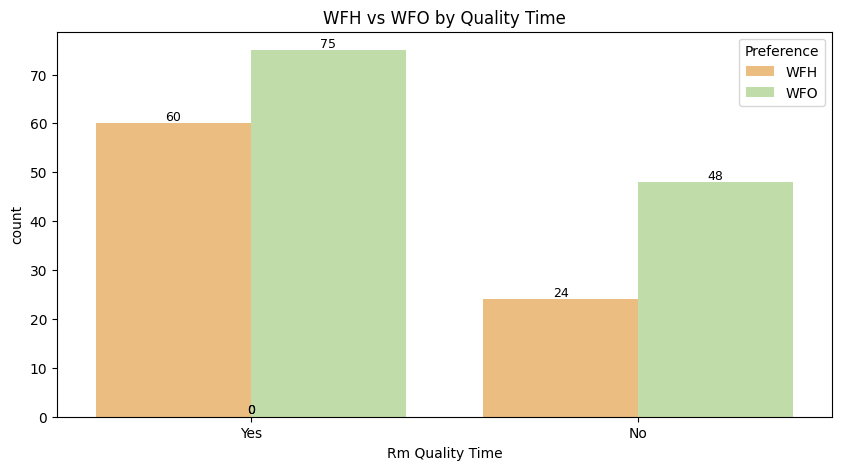

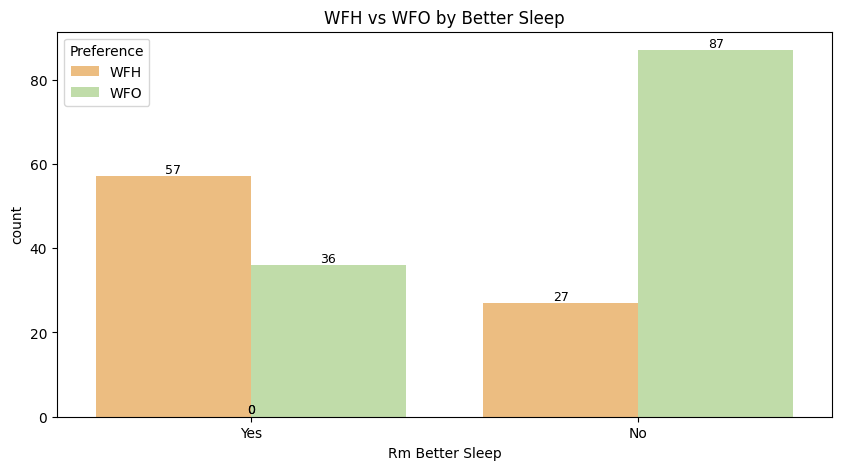

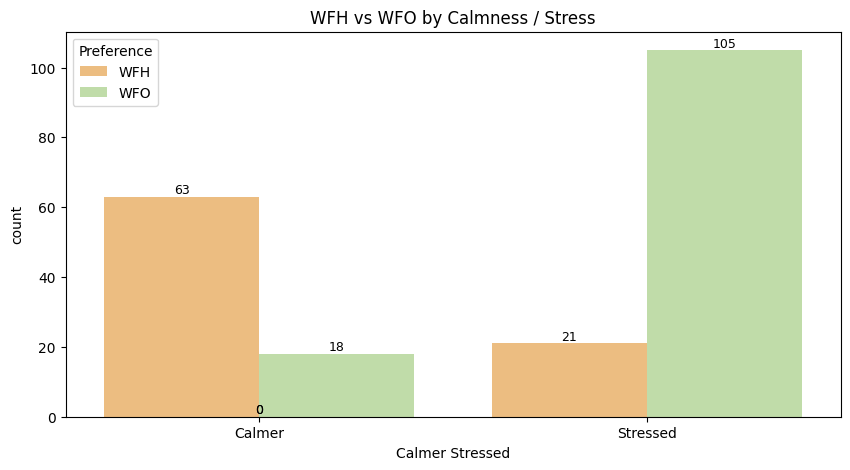

In [ ]:
# Rm Save Money
if 'Rm Save Money' in data.columns and 'Preference' in data.columns:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x='Rm Save Money', hue='Preference', data=data, palette='Spectral')
    add_counts(ax)
    plt.title("WFH vs WFO by Save Money")
    plt.show()

# Rm Quality Time
if 'Rm Quality Time' in data.columns and 'Preference' in data.columns:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x='Rm Quality Time', hue='Preference', data=data, palette='Spectral')
    add_counts(ax)
    plt.title("WFH vs WFO by Quality Time")
    plt.show()

# Rm Better Sleep
if 'Rm Better Sleep' in data.columns and 'Preference' in data.columns:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x='Rm Better Sleep', hue='Preference', data=data, palette='Spectral')
    add_counts(ax)
    plt.title("WFH vs WFO by Better Sleep")
    plt.show()

# Calmer Stressed
if 'Calmer Stressed' in data.columns and 'Preference' in data.columns:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x='Calmer Stressed', hue='Preference', data=data, palette='Spectral')
    add_counts(ax)
    plt.title("WFH vs WFO by Calmness / Stress")
    plt.show()

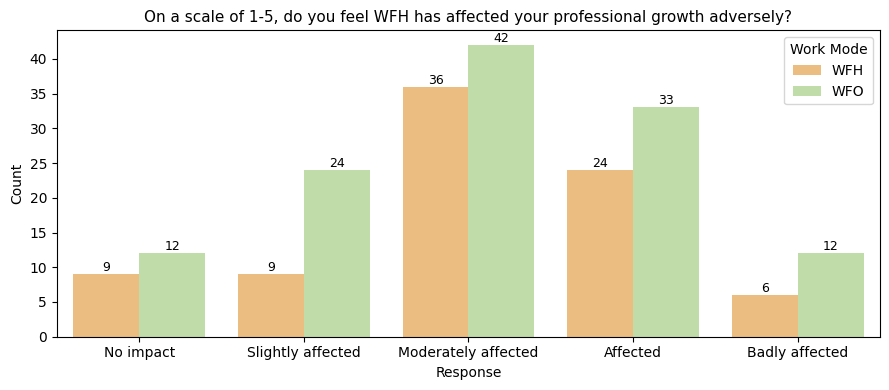

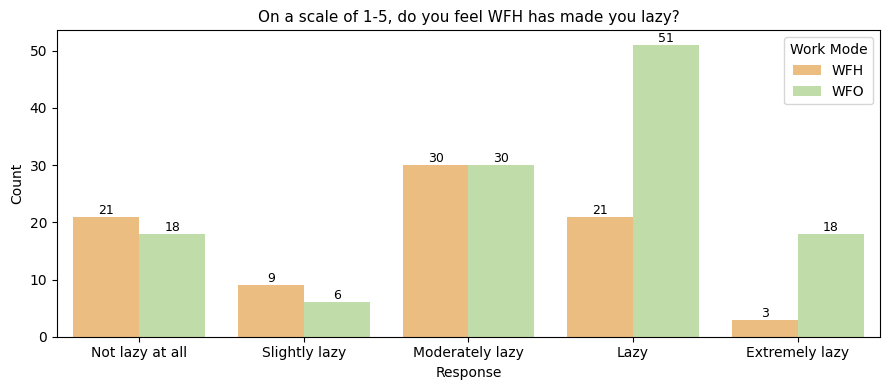

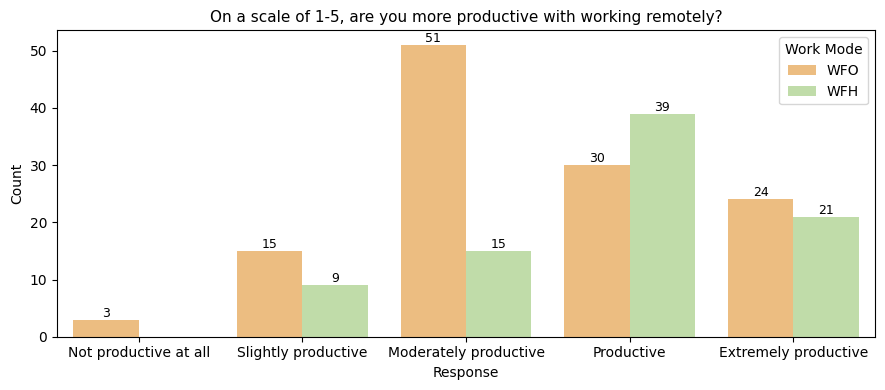

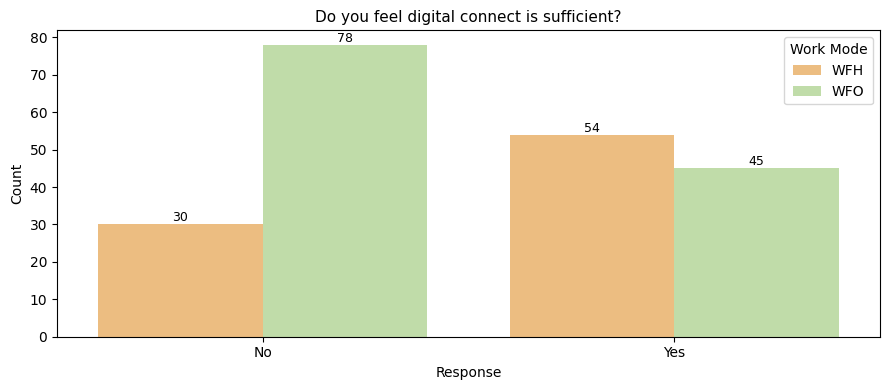

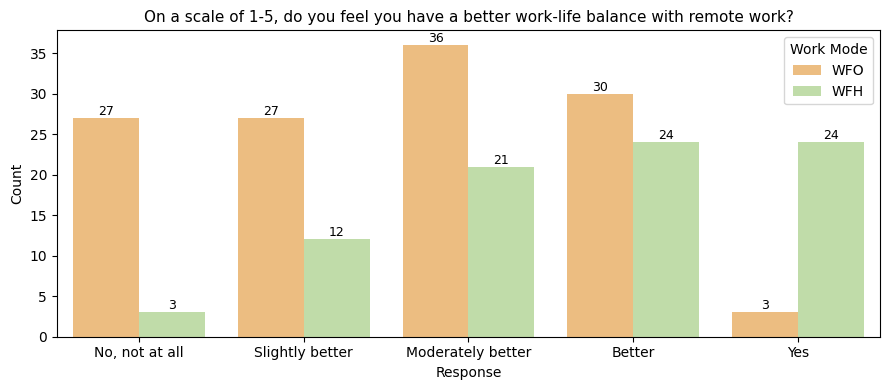

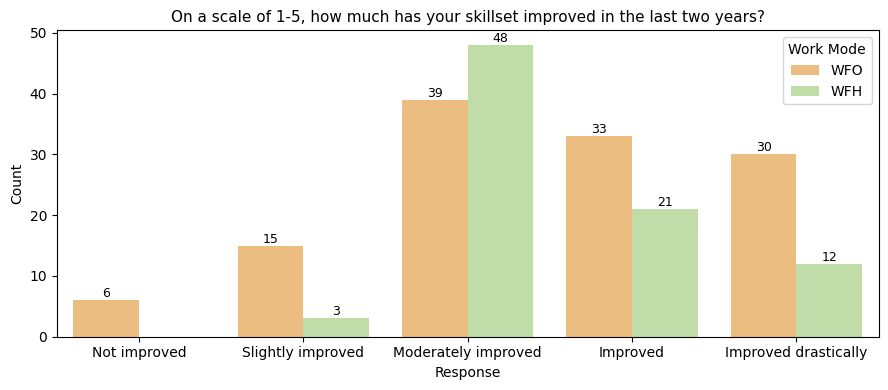

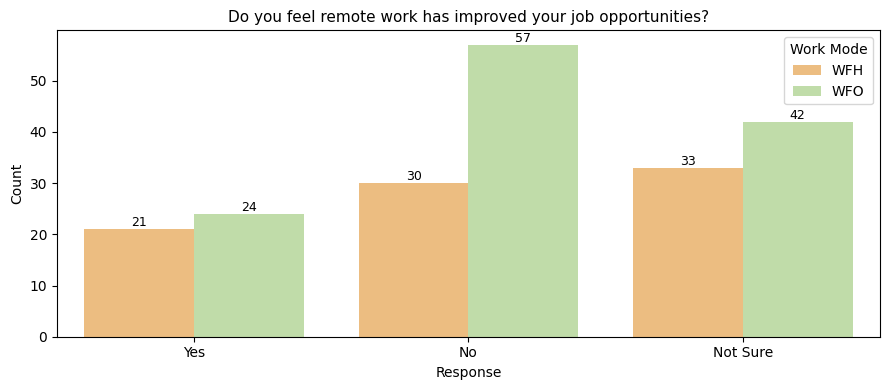

In [ ]:
# Columns Information & Labels

column_info = {
    "Rm Professional Growth": {
        "question": "On a scale of 1-5, do you feel WFH has affected your professional growth adversely?",
        "labels": {
            1: "No impact",
            2: "Slightly affected",
            3: "Moderately affected",
            4: "Affected",
            5: "Badly affected"
        }
    },
    "Rm Lazy": {
        "question": "On a scale of 1-5, do you feel WFH has made you lazy?",
        "labels": {
            1: "Not lazy at all",
            2: "Slightly lazy",
            3: "Moderately lazy",
            4: "Lazy",
            5: "Extremely lazy"
        }
    },
    "Rm Productive": {
        "question": "On a scale of 1-5, are you more productive with working remotely?",
        "labels": {
            1: "Not productive at all",
            2: "Slightly productive",
            3: "Moderately productive",
            4: "Productive",
            5: "Extremely productive"
        }
    },
    "Digital Connect Sufficient": {
        "question": "Do you feel digital connect is sufficient?",
        "labels": {
            "No":"No",
            "Yes":"Yes"
        }
    },
    "Rm Better Work Life Balance": {
        "question": "On a scale of 1-5, do you feel you have a better work-life balance with remote work?",
        "labels": {
            1: "No, not at all",
            2: "Slightly better",
            3: "Moderately better",
            4: "Better",
            5: "Yes"
        }
    },
    "Rm Improved Skillset": {
        "question": "On a scale of 1-5, how much has your skillset improved in the last two years?",
        "labels": {
            1: "Not improved",
            2: "Slightly improved",
            3: "Moderately improved",
            4: "Improved",
            5: "Improved drastically"
        }
    },
    "Rm Job Opportunities": {
        "question": "Do you feel remote work has improved your job opportunities?",
        "labels": {
            "Yes":"Yes",
            "No":"No",
            "Not sure":"Not Sure"
        }
    }
}

# Plotting Function (with WFH/WFO segregation)

def plot_column_counts(data, col, info, mode_col="Preference"):
    """
    Plots the counts of each response for a given column with proper labels,
    segregated by work mode (WFH/WFO).
    """
    plt.figure(figsize=(9, 4))

    # Countplot with side-by-side bars
    ax = sns.countplot(
        x=col,
        hue=mode_col,
        data=data,
        palette="Spectral",
        order=sorted(info["labels"].keys())  # ensure correct order
    )

    # Adding counts on top of bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(
                str(int(height)),
                (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='bottom',
                fontsize=9
            )

    # Setting title and labels
    plt.title(info["question"], fontsize=11)
    plt.xlabel("Response")
    plt.ylabel("Count")
    plt.xticks(
        ticks=range(len(info["labels"])),
        labels=list(info["labels"].values()),
        rotation=0
    )

    plt.legend(title="Work Mode")
    plt.tight_layout()
    plt.show()


# Main Loop to Plot All Columns

for col, info in column_info.items():
    plot_column_counts(data, col, info)

# Statistical Tests

In [ ]:
# Columns to analyze
columns = [
    'Age',
    'Occupation',
    'Gender',
    'Same Office Home Location',
    'Kids',
    'Rm Save Money',
    'Rm Quality Time',
    'Rm Better Sleep',
    'Calmer Stressed',
    'Rm Professional Growth',
    'Rm Lazy',
    'Rm Productive',
    'Digital Connect Sufficient',
    'Rm Better Work Life Balance',
    'Rm Improved Skillset',
    'Rm Job Opportunities'
]

# Map Yes/No/Not sure to numbers for categorical variables (optional)
yn_mapping = {"Yes": 1, "No": 0, "Not sure": np.nan}
for col in ['Same Office Home Location','Kids','Rm Save Money', 'Rm Quality Time',
            'Rm Better Sleep','Digital Connect Sufficient', 'Rm Job Opportunities']:
    if col in data.columns:
        data[col] = data[col].map(yn_mapping)

# Map CALMER/STRESSED to numbers (optional)
calmer_mapping = {"CALMER": 1, "STRESSED": 0}
if 'Calmer Stressed' in data.columns:
    data['Calmer Stressed'] = data['Calmer Stressed'].map(calmer_mapping)

# Define categorical columns
categorical_cols = [
    'Gender','Same Office Home Location','Kids',
    'Rm Save Money','Rm Quality Time','Rm Better Sleep',
    'Digital Connect Sufficient','Rm Job Opportunities','Calmer Stressed','Occupation'
]

# Store results
results = []

# Run tests
for col in columns:
    if col not in data.columns:
        results.append((col, "Column not found", "", ""))
        continue

    wfh_group = data[data['Preference'] == 'WFH'][col].dropna()
    wfo_group = data[data['Preference'] == 'WFO'][col].dropna()

    if len(wfh_group) == 0 or len(wfo_group) == 0:
        results.append((col, "Not enough data", "", ""))
        continue

    # Categorical → Chi-square or Fisher exact if 2x2
    if col in categorical_cols:
        contingency = pd.crosstab(data[col], data['Preference'])
        if contingency.shape[0] > 1 and contingency.shape[1] > 1:
            if contingency.shape == (2, 2):
                # Fisher's exact test for 2x2
                oddsratio, p = stats.fisher_exact(contingency)
                sig = "Significant" if p < 0.05 else "Not Significant"
                results.append((col, "Fisher exact", f"p={p:.4f}", sig))
            else:
                # Chi-square for larger tables
                chi2, p, dof, ex = stats.chi2_contingency(contingency)
                sig = "Significant" if p < 0.05 else "Not Significant"
                results.append((col, f"Chi2={chi2:.2f}", f"p={p:.4f}", sig))
        else:
            results.append((col, "Not enough variation", "", ""))

    # Numeric/ordinal → Mann–Whitney U
    else:
        stat, p = stats.mannwhitneyu(pd.to_numeric(wfh_group, errors='coerce'),
                                     pd.to_numeric(wfo_group, errors='coerce'),
                                     alternative='two-sided')
        sig = "Significant" if p < 0.05 else "Not Significant"
        results.append((col, f"U={stat:.2f}", f"p={p:.4f}", sig))

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=["Column", "Statistic", "p-value", "Significance"])
print(results_df)

                         Column        Statistic   p-value     Significance
0                           Age            U=nan     p=nan  Not Significant
1                    Occupation        Chi2=5.75  p=0.4523  Not Significant
2                        Gender     Fisher exact  p=0.5713  Not Significant
3     Same Office Home Location     Fisher exact  p=0.0334      Significant
4                          Kids     Fisher exact  p=0.0875  Not Significant
5                 Rm Save Money     Fisher exact  p=1.0000  Not Significant
6               Rm Quality Time     Fisher exact  p=0.1385  Not Significant
7               Rm Better Sleep     Fisher exact  p=0.0000      Significant
8               Calmer Stressed  Not enough data                           
9        Rm Professional Growth        U=5292.00  p=0.7572  Not Significant
10                      Rm Lazy        U=3559.50  p=0.0001      Significant
11                Rm Productive        U=6354.00  p=0.0034      Significant
12   Digital

# Average Scores

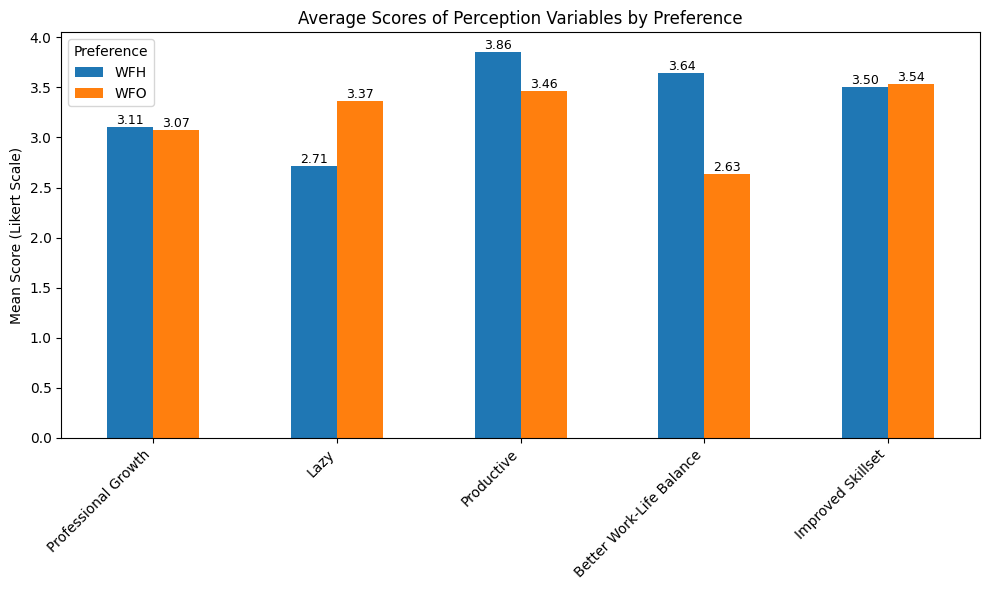

In [ ]:
import matplotlib.pyplot as plt

# Define perception variables
perception_vars = [
    "Rm Professional Growth",
    "Rm Lazy",
    "Rm Productive",
    "Rm Better Work Life Balance",
    "Rm Improved Skillset"
]

# Mapping of dataset column names to clean display labels
label_mapping = {
    "Rm Professional Growth": "Professional Growth",
    "Rm Lazy": "Lazy",
    "Rm Productive": "Productive",
    "Rm Better Work Life Balance": "Better Work-Life Balance",
    "Rm Improved Skillset": "Improved Skillset"
}

# Group and calculate mean
mean_scores = data.groupby('Preference')[perception_vars].mean().T

# Rename the index to use clean labels
mean_scores.rename(index=label_mapping, inplace=True)

# Plot
ax = mean_scores.plot(kind='bar', figsize=(10,6))
plt.title("Average Scores of Perception Variables by Preference")
plt.ylabel("Mean Score (Likert Scale)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Preference')

# Annotate bar values
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# Define all variables
all_vars = [
    "Rm Save Money",
    "Rm Quality Time",
    "Rm Better Sleep",
    "Rm Professional Growth",
    "Rm Lazy",
    "Rm Productive",
    "Rm Better Work Life Balance",
    "Rm Improved Skillset",
    "Rm Job Opportunities"
]

# Mapping for clean labels
label_mapping = {
    "Rm Save Money": "Save Money",
    "Rm Quality Time": "Quality Time",
    "Rm Better Sleep": "Better Sleep",
    "Rm Professional Growth": "Professional Growth",
    "Rm Lazy": "Lazy",
    "Rm Productive": "Productive",
    "Rm Better Work Life Balance": "Better Work-Life Balance",
    "Rm Improved Skillset": "Improved Skillset",
    "Rm Job Opportunities": "Job Opportunities"
}

# Heat Map

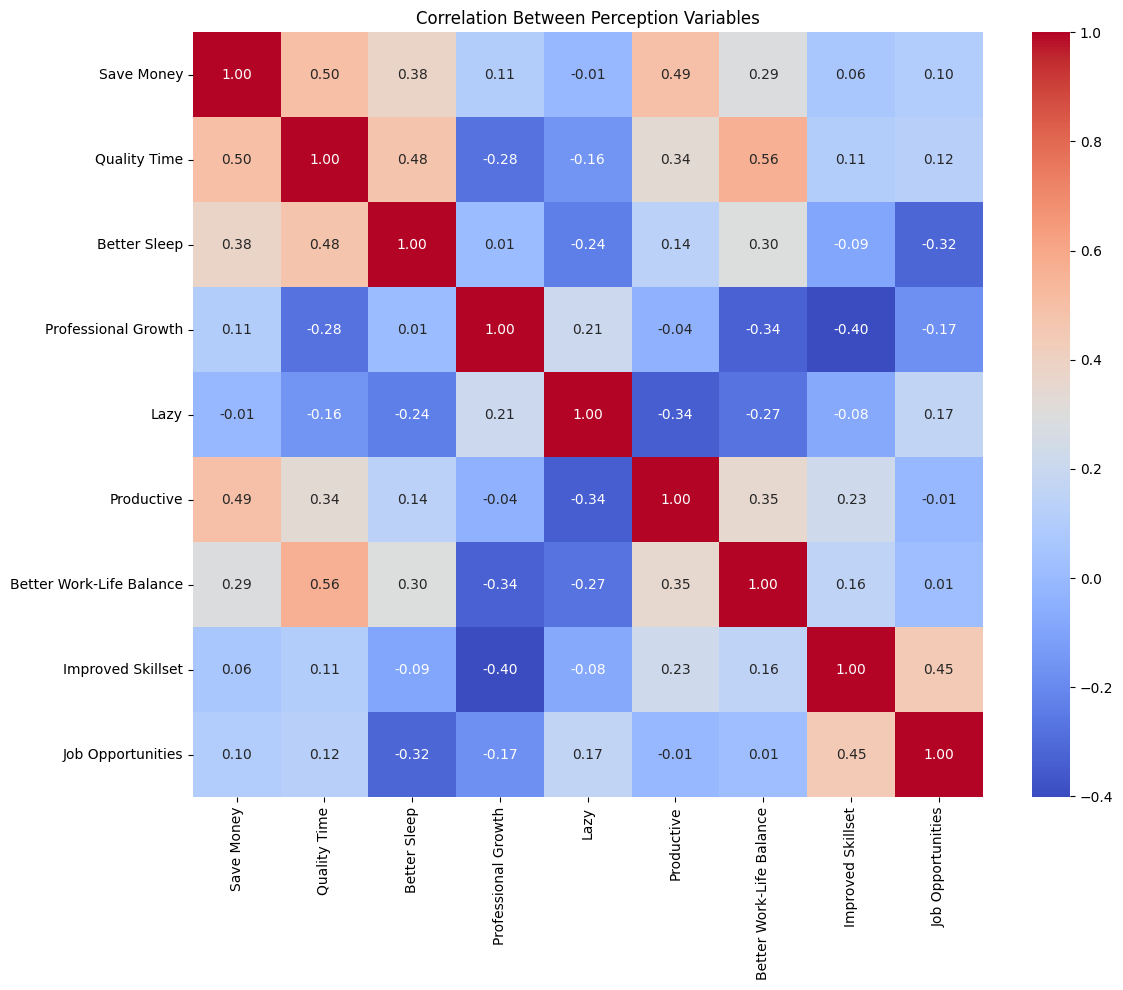

In [ ]:
# Correlation matrix of all variables (numeric ones only will matter here)
corr = data[all_vars].corr()

# Apply clean labels to rows & columns
corr.rename(index=label_mapping, columns=label_mapping, inplace=True)

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Perception Variables")
plt.tight_layout()
plt.show()